In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [39]:
df = pd.read_fwf("brain_body.txt")
df.head()

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5


In [40]:
df.shape

(62, 2)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Brain   62 non-null     float64
 1   Body    62 non-null     float64
dtypes: float64(2)
memory usage: 1.1 KB


In [42]:
df.describe()

,Brain,Body
count,62.000000,62.000000
mean,198.789984,283.134194
std,899.158011,930.278942
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,6654.000000,5712.000000


### Outlier detection using IQR

In [43]:
iqr=df.Brain.quantile(0.75)-df.Brain.quantile(0.25)
lower_threshold_Brain=df.Brain.quantile(0.25)-(1.5*iqr)
upper_threshold_Brain=df.Brain.quantile(0.75)+(1.5*iqr)
print(lower_threshold_Brain,upper_threshold_Brain)

-70.80375000000001 119.60625


In [44]:
iqr=df.Body.quantile(0.75)-df.Body.quantile(0.25)
lower_threshold_Body=df.Body.quantile(0.25)-(1.5*iqr)
upper_threshold_Body=df.Body.quantile(0.75)+(1.5*iqr)
print(lower_threshold_Body,upper_threshold_Body)

-238.375 408.625


check how many points that vilolate atleast one of the threshold value

In [45]:
df.loc[(df.Brain>upper_threshold_Brain)|(df.Brain<lower_threshold_Brain)|(df.Body>upper_threshold_Body)|(df.Body<lower_threshold_Body)]

,Brain,Body
3,465.00,423.0
18,2547.00,4603.0
20,187.10,419.0
21,521.00,655.0
27,529.00,680.0
28,207.00,406.0
31,62.00,1320.0
32,6654.00,5712.0
41,250.00,490.0
45,52.16,440.0


clip all these points

In [46]:
df.Brain=df.Brain.clip(lower_threshold_Brain, upper_threshold_Brain)
df.Body=df.Body.clip(lower_threshold_Body, upper_threshold_Body)

In [47]:
df.describe()

,Brain,Body
count,62.000000,62.000000
mean,29.176476,104.676532
std,45.213842,148.635231
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,119.606250,408.625000


all points are now fall within lower and upper threshold range

### checking for null values

In [48]:
df.isnull().sum()

Brain    0
Body     0
dtype: int64

conclusion: no null values

### drop duplicate values

In [49]:
df = df.drop_duplicates()
df.shape

(56, 2)

Conclusion: 6 duplicates removed

In [50]:
df.dtypes

Brain    float64
Body     float64
dtype: object

# EDA

### Histogram

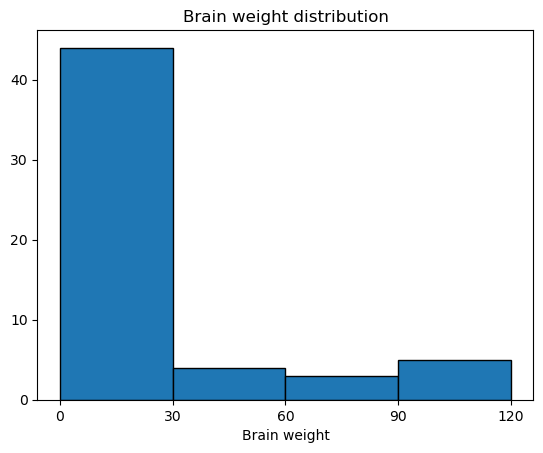

In [51]:
import matplotlib.pyplot as plt
plt.hist(df["Brain"],edgecolor='black', bins=np.arange(0,121,30))
plt.xticks(np.arange(0,121,30))
plt.xlabel("Brain weight");
plt.title("Brain weight distribution");

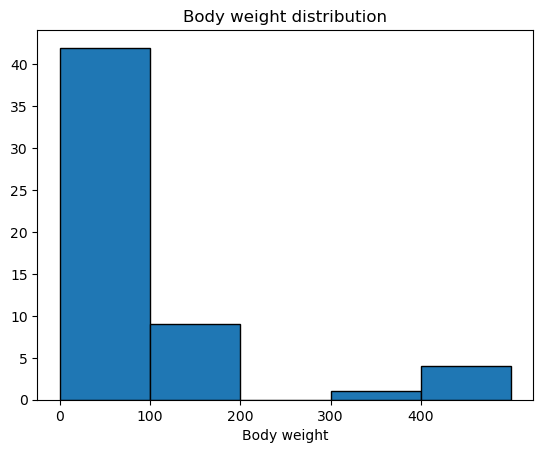

In [52]:
import matplotlib.pyplot as plt
plt.hist(df["Body"],edgecolor='black', bins=np.arange(0,501,100))
plt.xticks(np.arange(0,451,100))
plt.xlabel("Body weight");
plt.title("Body weight distribution");

### Scatter plot

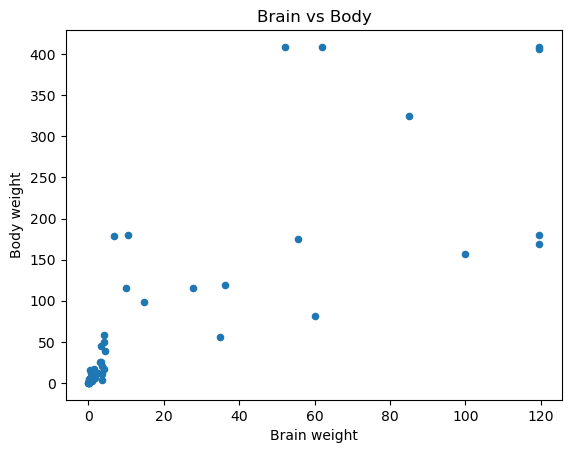

In [53]:
df.plot(x='Brain', y='Body',kind="scatter",style='o',xlabel="Brain weight",ylabel="Body weight",title="Brain vs Body");

By the above plot , we can say that there is linear relationship between 'Brain' and 'Body'

In [54]:
df.corr()

,Brain,Body
Brain,1.000000,0.798773
Body,0.798773,1.000000


correlation value '0.79' indicates there is strong positive correlation exist between 'Brain' and 'Body'

Here first we consider 'Brain' as feature and 'Body' as target

### Train and Test split

In [55]:
X = df[['Brain']].values
y = df['Body'].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Scaling

In [56]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train) 
X_train_scaled = scaler.transform(X_train) # fit (mean, sd) and then transform the training data
X_test_scaled = scaler.transform(X_test) # 

In [57]:
X_train_scaled.shape,X_test_scaled.shape

((39, 1), (17, 1))

### Modelling

In [58]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

LinearRegression()

In [59]:
y_pred=regressor.predict(X_test_scaled)

In [60]:
nw=pd.DataFrame({"Real":y_test,"Predicted":y_pred})
nw

,Real,Predicted
0,11.400,30.150780
1,6.600,28.749416
2,5.000,26.941204
3,408.625,296.830975
4,98.200,60.008881
5,17.500,29.676124
6,12.500,29.653522
7,175.000,151.933860
8,3.000,26.764903
9,2.600,28.523389


In [61]:
coef=pd.DataFrame(regressor.coef_,["Brain"],["Coefficients"])
coef

,Coefficients
Brain,81.283766


In [62]:
print("Intercept is",regressor.intercept_)

Intercept is 72.74435897435897


#### Linear Regression equation(y=mx+c) for this model

Predicted Body=(88.987208*Brain)+(83.4446)

### Matrics

In [63]:
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.8669568677651629


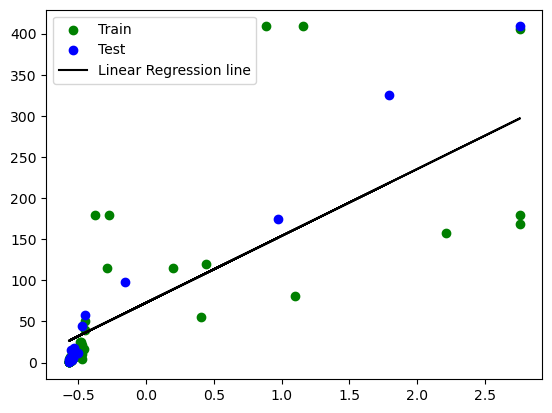

In [64]:
plt.scatter(X_train_scaled, y_train,color='g') 
plt.scatter(X_test_scaled, y_test,color='b')
plt.plot(X_test_scaled, y_pred,color='k') 
plt.legend(["Train","Test","Linear Regression line"])
plt.show()

Now we consider 'Body' as feature and 'Brain' as target

### Train and Test split

In [65]:
X = df[['Body']].values
y = df['Brain'].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Scaling

In [66]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train) # we are finding the values of mean and sd from the td
X_train_scaled = scaler.transform(X_train) # fit (mean, sd) and then transform the training data
X_test_scaled = scaler.transform(X_test) # transform the test data 

In [67]:
X_train_scaled.shape,X_test_scaled.shape

((39, 1), (17, 1))

### Modelling

In [68]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

LinearRegression()

In [69]:
y_pred=regressor.predict(X_test_scaled)

In [70]:
nw=pd.DataFrame({"Real":y_test,"Predicted":y_pred})
nw

,Real,Predicted
0,6.80000,44.528988
1,0.06000,3.371178
2,0.07500,3.417422
3,119.60625,97.016757
4,0.12200,3.833625
5,100.00000,39.442068
6,4.19000,16.550926
7,3.00000,8.920545
8,0.78500,3.949237
9,1.40000,6.030250


In [71]:
coef=pd.DataFrame(regressor.coef_,["Body"],["Coefficients"])
coef

,Coefficients
Body,27.431936


In [72]:
print("Intercept is",regressor.intercept_)

Intercept is 21.603429487179486


#### Linear Regression equation(y=mx+c) for this model

Predicted Brain=(28.429169*Body)+(20.72689102564103)

### Matrics

In [73]:
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.7115739309843617


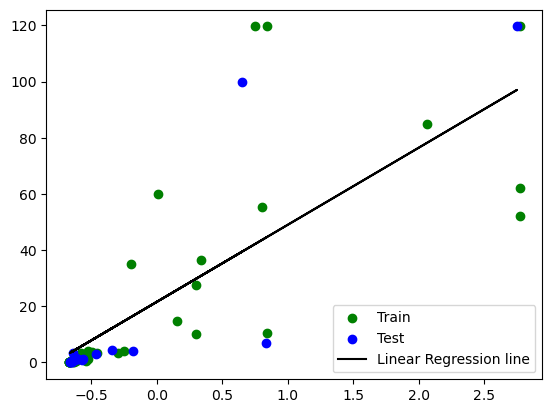

In [74]:
plt.scatter(X_train_scaled, y_train,color='g') 
plt.scatter(X_test_scaled, y_test,color='b')
plt.plot(X_test_scaled, y_pred,color='k') 
plt.legend(["Train","Test","Linear Regression line"])
plt.show()